In [1]:
import numpy as np
import matplotlib.pyplot as plt

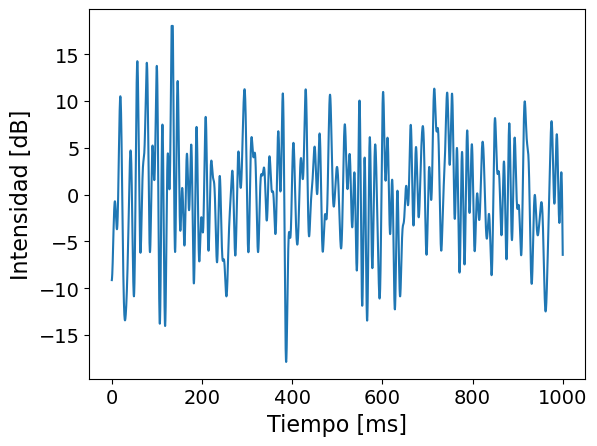

In [2]:
t, I = np.loadtxt('stimulus.dat', delimiter='\t', unpack=True)
plt.plot(t, I)
plt.xlabel('Tiempo [ms]', fontsize=16)
plt.ylabel('Intensidad [dB]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 3/figuras/inicio1.png', dpi=300, bbox_inches='tight')

In [3]:
spikes = []

with open('spikes.dat') as f:
    for line in f:
        spikes.append([float(x) for x in line.strip().split()])

spikes = np.array(spikes)

spikes.shape

(128, 10000)

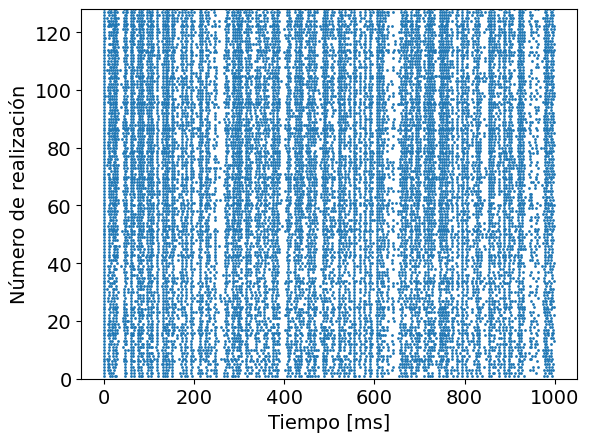

In [4]:
X = np.linspace(0, 1000, 10000)
for i in range(len(spikes)):
    Y = []
    for j in range(len(spikes[i])):
        if spikes[i][j] == 0:
            Y.append(-2)
        else:
            Y.append(1)
    Y = np.array(Y)
    plt.plot(X, (i+1)*Y, '.', color='#1f77b4', markersize=2)
plt.ylim(0, 128)
plt.xlabel('Tiempo [ms]', fontsize=14)
plt.ylabel('Número de realización', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 3/figuras/inicio2.png', dpi=300, bbox_inches='tight')

1. Obtener un histograma que aproxime la distribución de intervalos P(ISI) de la neurona, considerando todas las realizaciones. Calcule el coeficiente de variabilidad CV.

Media: 8.455856557279297
Desviación estándar: 5.576030175429855
CV: 0.6594281889313367


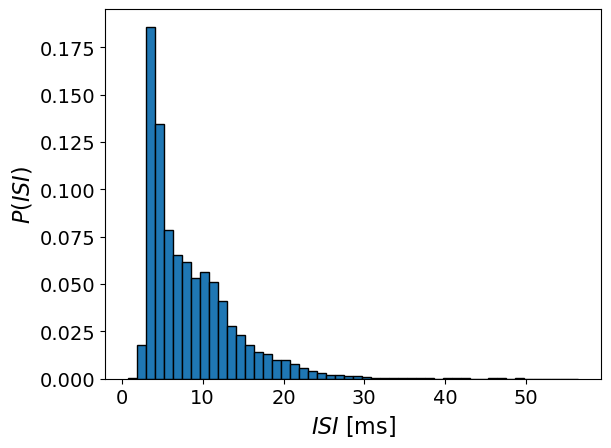

In [5]:
ISI = []
dt = 0.1

for i in range(len(spikes)):
    index = np.where(spikes[i] == 1)[0]
    for j in range(len(index)):
        ISI.append(np.diff(index)*dt)

ISI = np.concatenate(ISI)

# Histograma
plt.hist(ISI, bins=50, density=True, edgecolor='black')
plt.xlabel('$ISI$ [ms]', fontsize=16)
plt.ylabel('$P(ISI)$', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 3/figuras/ej1.png', dpi=300, bbox_inches='tight')


# Hallo la media, la desviación estándar y el CV
mean = np.mean(ISI)
std = np.std(ISI)
CV = std/mean

print('Media:', mean)
print('Desviación estándar:', std)
print('CV:', CV)

2. Obtener un histograma que aproxime la probabilidad P(N) de obtener N spikes en una dada realización. Calcular el factor de Fano F. En base a este resultado y al del punto anterior: ¿el proceso de generación de spikes es un proceso tipo renewal?

Media: 117.0078125
Varianza: 183.19525146484375
Factor de Fano: 1.5656668349803031


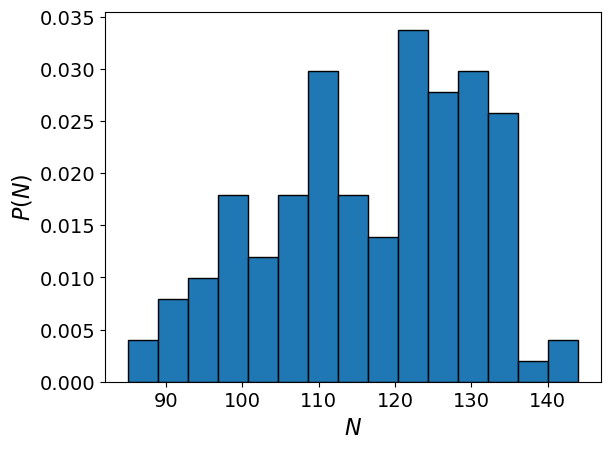

In [9]:
N = []

for i in range(len(spikes)):
    N.append(np.sum(spikes[i]))

N = np.array(N)

# Histograma
plt.hist(N, bins=15, density=True, edgecolor='black')
plt.xlabel('$N$', fontsize=16)
plt.ylabel('$P(N)$', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 3/figuras/ej2.png', dpi=300, bbox_inches='tight')

# Factor de Fano
Fano = np.var(N)/np.mean(N)

print('Media:', np.mean(N))
print('Varianza:', np.var(N))
print('Factor de Fano:', Fano)

# No es de renewal porque el factor de Fano es distinto de CV^2

3. Estimar la tasa de disparo dependiente del tiempo r(t), promediando todas la realizaciones y usando un tamaño de bin adecuado.

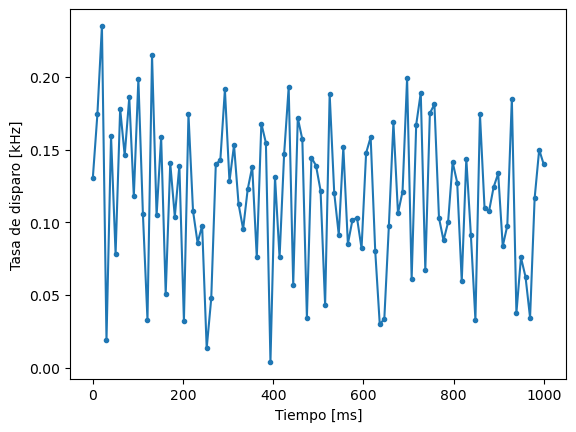

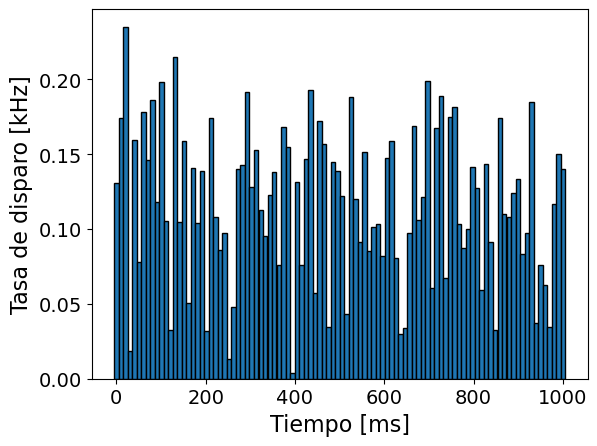

In [7]:
window = 100
N_window = int(len(spikes[0])/window)

N = []

for i in range(N_window):
    N_aux = []
    for j in range(len(spikes)):
        N_aux.append(np.sum(spikes[j][i*window:(i+1)*window]))
    
    N.append(np.array(N_aux).mean())

N = np.array(N)
r = N/(100*dt)
T = np.linspace(0, 1000, len(N))

# Gráfico de puntos
plt.plot(T, r, '.-')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Tasa de disparo [kHz]')

# Gráfico de barras
plt.figure()
plt.bar(T, r, width=10, edgecolor='black')
plt.xlabel('Tiempo [ms]', fontsize=16)
plt.ylabel('Tasa de disparo [kHz]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 3/figuras/ej3.png', dpi=300, bbox_inches='tight')

4. Calcular el filtro asociado a esta neurona, que da la mejor predicción lineal del histograma dependiente del tiempo r(t). Despreciar el tiempo de autocorrelación del estímulo.

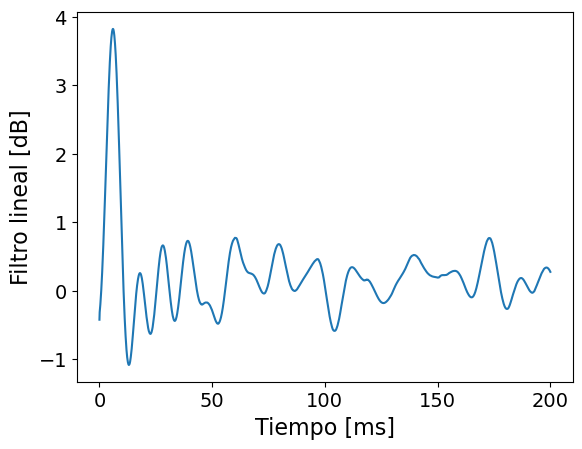

In [11]:
cant_spikes = spikes.sum(axis=0)
total = cant_spikes.sum()

filtro = []
tiempo = []

for t in range(2001):
    suma = 0
    for i in range(len(cant_spikes)):
        t_previo = i - t
        if(t_previo >= 0):
            suma += cant_spikes[i] * I[t_previo]  
    
    filtro.append(suma / total)
    tiempo.append(t / 10)

filtro = np.array(filtro)
tiempo = np.array(tiempo)

plt.plot(tiempo, filtro)
plt.xlabel('Tiempo [ms]', fontsize=16)
plt.ylabel('Filtro lineal [dB]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 3/figuras/ej4.png', dpi=300, bbox_inches='tight')

In [12]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(filtro, height=3)
tiempo[peaks]

array([6.])